# Neural Networks - Case Study II

## Predicting Chances of Surviving the Titanic Disaster

### Project Scope:

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

**Your Role:**

Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


**Specifics:** 

* Machine Learning task: Classification model 
* Target variable: **Survived** 
* Input variables: Refer to data dictionary below
* Success Criteria: Accuracy of 80% and above

### **Data Dictionary:**

The dataset contains several parameters which were recorded about the passengers.
The parameters included are : 

**PassengerId:** Passenger Identifier\
**Survived:** (0 = No, 1 = Yes) \
**Pclass:** - Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd) \
**Name** - Name of the Passenger\
**Sex:**  Gender of the passenger \
**Age:** Age in years  \
**SibSp:** No. of siblings / spouses aboard the Titanic \
**Parch:** No. of parents / children aboard the Titanic \
**Ticket:** Ticket Number \
**Fare:** Passenger Fare\
**Cabin:** Cabin - 'U' is for Unkown\
**Embarked:** Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### **Loading the libraries and the dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
# load the train.csv file using the pandas `read_csv()` function. 
df = pd.read_csv('Titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S


#### What features do you think contribute to a high survival rate ?

In [3]:
# Drop the unnecessary ones
df.drop(['PassengerId','Name','Ticket'],axis=1, inplace=True)

In [4]:
# explore the data quickly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


#### The training set has 891 examples and 11 features + the target variable (survived).

In [5]:
# look at some summary stats
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Observation:**
* we can see that __ % out of the training-set survived the Titanic
* Age of passengers is between __ & __ 

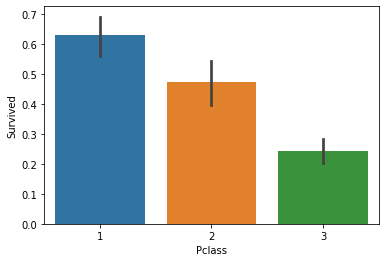

In [6]:
# check if passenger class has anything to do with survival. Plot a bar plot of Pclass vs Survived
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()

In [7]:
# calculate the correlation of all features with target variable
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### Data Prep Required

1. convert object type features into numeric ones.
2. features have different ranges, convert into roughly the same scale. 
3. Some features contain missing values (NaN = not a number) that need to be replaced.

In [8]:
# check for missing data
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      0
dtype: int64

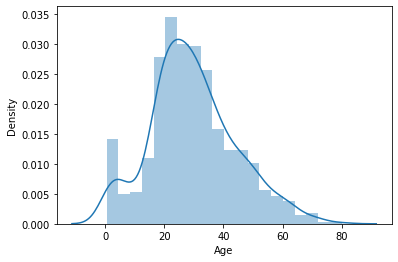

In [9]:
# check distribution of Age
sns.distplot(df['Age'])
plt.show()

In [10]:
# calculate mean 'age'
df['Age'].mean()

29.69911764705882

In [11]:
# replace nan with 29. (Not Advised)
df['Age'].fillna(29, inplace=True)

In [12]:
# convert it to int type
df['Age']=df['Age'].astype(int)

In [13]:
# Create dummy variables for all 'object' type variables 
df = pd.get_dummies(df, columns=['Cabin', 'Embarked', 'Sex'])
df.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22,1,0,7.2500,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,1,1,38,1,0,71.2833,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [14]:
# saving this processed dataset
df.to_csv('Processed_Titanic_Dataset.csv', index=None)

### Data Partition

In [15]:
# Seperate the input features and target variable
x = df.drop('Survived',axis=1)
y = df.Survived

In [16]:
# splitting the data in training and testing set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=123)

In [17]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((712, 19), (179, 19), (712,), (179,))

## **Models**

In [18]:
# Import RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    int64  
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Cabin_A     891 non-null    uint8  
 7   Cabin_B     891 non-null    uint8  
 8   Cabin_C     891 non-null    uint8  
 9   Cabin_D     891 non-null    uint8  
 10  Cabin_E     891 non-null    uint8  
 11  Cabin_F     891 non-null    uint8  
 12  Cabin_G     891 non-null    uint8  
 13  Cabin_T     891 non-null    uint8  
 14  Cabin_U     891 non-null    uint8  
 15  Embarked_C  891 non-null    uint8  
 16  Embarked_Q  891 non-null    uint8  
 17  Embarked_S  891 non-null    uint8  
 18  Sex_female  891 non-null    uint8  
 19  Sex_male    891 non-null    u

In [20]:
rfmodel = RandomForestClassifier(n_estimators=100, min_samples_leaf=5)
rfmodel.fit(xtrain, ytrain)

# predict on xtest
ypred = rfmodel.predict(xtest)

from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(ypred, ytest),'\n')
print(confusion_matrix(ytest, ypred))

0.8491620111731844 

[[103  11]
 [ 16  49]]


In [21]:
rfmodel.feature_importances_

array([0.09935118, 0.10299261, 0.03720763, 0.02220387, 0.15642296,
       0.00134354, 0.00775796, 0.00764956, 0.00917964, 0.00427126,
       0.00099238, 0.        , 0.        , 0.0381174 , 0.01074611,
       0.00479246, 0.01409119, 0.24766256, 0.23521771])

In [22]:
rfmodel.feature_names_in_

array(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_U', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female',
       'Sex_male'], dtype=object)

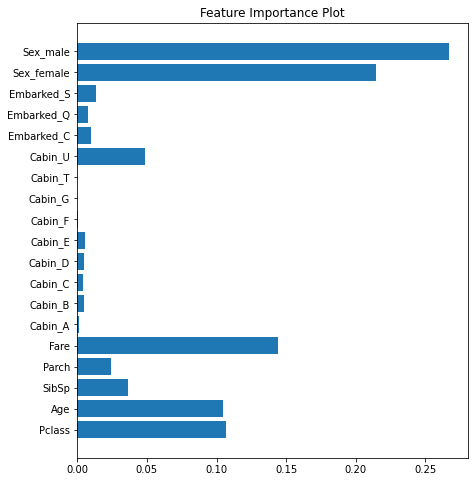

In [23]:
plt.figure(figsize=(7,8))
plt.barh(rfmodel.feature_names_in_,rfmodel.feature_importances_)
plt.title('Feature Importance Plot')
plt.show()

In [ ]:
# to get in sorted order
sorted_idx = rfmodel.feature_importances_.argsort()
plt.barh(rfmodel.feature_names_in_[sorted_idx], rfmodel.feature_importances_[sorted_idx])

## Save Model

In [1]:
# import pickle to save model
import pickle

In [ ]:
# Save the trained model on the drive 
pickle.dump(rfmodel, open('Model','wb'))

In [ ]:
# Load the pickled model
rfmodel = pickle.load(open('Model','rb'))

In [26]:
df2 = pd.read_csv('Titanic_test.csv')
df2.head()

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,U,Q
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,U,S
2,2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,U,Q
3,3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,U,S
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,U,S


## Take away exercise

* 1. Train a Neural Network on this dataset

* 2. Load the saved model and use it on the test set to make predictions

In [27]:
# Load the pickled model
rfmodel = pickle.load(open('Model','rb'))

<IPython.core.display.Javascript object>